This notebook accompanies *An Introduction to Statistical Learning*, Chapter 1. This text is available as a free pdf [here](http://www-bcf.usc.edu/~gareth/ISL/). 

<img src="http://www-bcf.usc.edu/~gareth/ISL/ISL%20Cover%202.jpg" width=250px>

# An Introduction to Statistical Learning

## Chapter 1 - Introduction

**Statistical Learning** refers to a vast set of tools for **understanding data**. 

These tools can be classified as **supervised** or **unsupervised**. 

Broadly speaking, supervised statistical learning involves building a statistical model for predicting, or estimating, an output based on one or more inputs. 

With unsupervised statistical learning, there are inputs but no supervising output.

## Wage Data

#### Domain 

This problem is drawn from the analysis of population demographic data. 

#### Problem Statement

Given certain information about males from the United States, we will use supervised learning to develop a regression model that can predict a member of the population's wage.

We examine a number of factors that relate to wages for a group of males from the Atlantic region of the United States. 

In particular, we wish to understand the association between an employee’s `age` and `education`, as well as the calendar `year`, on his `wage`.

#### Dataset and Inputs

The dataset to be examined contains survey information from the central Atlantic region of the United States. 

#### Solution Statement

A solution to this problem will be a regression model such as a linear regression, a decision tree regressor, or a support vector regressor. 

#### Benchmark Model

Given that we seek a regression model a good naive benchmark would be to use either the mean or the median of the wages for the dataset. 

#### Evaluation Metrics

Given that this is a regression task, we can measure the success of our model using the $R^2$ metric, the Mean Absolute Error, or the Mean Squared Error.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
wage_df = pd.read_csv('data/Wage.csv')
wage_df.sample(4)

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
1574,450118,2009,47,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.505150,90.481913
640,374391,2008,29,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.653213,104.921507
433,306092,2007,49,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,3.869232,47.905567
962,13960,2005,32,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,2. No,4.724276,112.648896


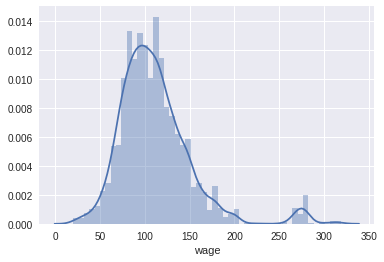

In [12]:
sns.distplot(wage_df.wage)

Figure 1.1


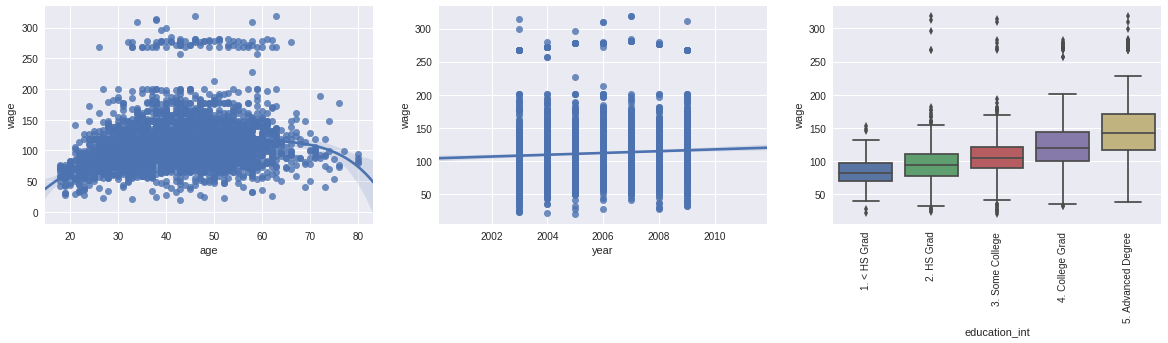

In [3]:
fig = plt.figure(figsize=(20,4))

fig.add_subplot(131)
sns.regplot(x='age', y='wage', data=wage_df, order=5)

fig.add_subplot(132)
sns.regplot(x='year', y='wage', data=wage_df)

fig.add_subplot(133)
wage_df['education_int'] = wage_df['education'].str.extract('(\d)', expand=False).astype(int)
education_labels = wage_df['education'].unique()
education_labels.sort()
sns.boxplot(x='education_int', y='wage', data=wage_df)
plt.xticks(np.arange(len(education_labels)),education_labels, rotation='vertical')

print("Figure 1.1")

## Stock Market Data

#### Domain 

This problem is drawn from the analysis of stock market performance. 

#### Problem Statement

For a single stock, given knowledge about the previous days' change, we will use supervised learning to develop a classification model to predict whether the stock will increase or decrese in the next day.

#### Dataset and Inputs

The dataset to be examined contains the year, the change for the five previous days, the trading volume, the day's change, and a categorical variable describing whether the stock rose or fell on that day. This is for a single stock from 2001 to 2005.

#### Solution Statement

A solution to this problem will be a classification model such as a logistic regression, a decision tree classfier, or a support vector classifier. 

#### Benchmark Model

Given that we seek a classification model a good naive benchmark would be to guess the most common class.

#### Evaluation Metrics

Given that this is a classification task, and there is a slight imbalance in our dataset (more Up than Down), we can measure the success of our model using the F1 Score.



In [5]:
market_df = pd.read_csv('data/Smarket.csv', index_col='Index')
market_df.sample(4)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Index,,,,,,,,,
889,2004,0.993,-0.196,-0.970,0.271,-1.334,1.6108,0.054,Up
916,2004,1.121,0.151,0.463,-0.778,0.243,1.1184,-0.418,Down
233,2001,0.331,-1.556,0.027,-0.278,-1.587,1.3068,1.003,Up
883,2004,-0.044,-0.479,-0.430,-0.329,0.071,1.3199,0.706,Up


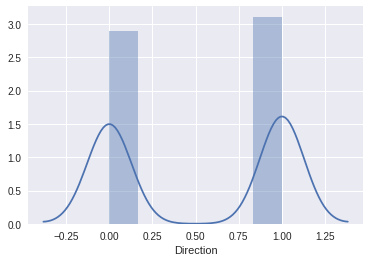

In [6]:
sns.distplot(market_df.Direction == 'Up')

Figure 1.2


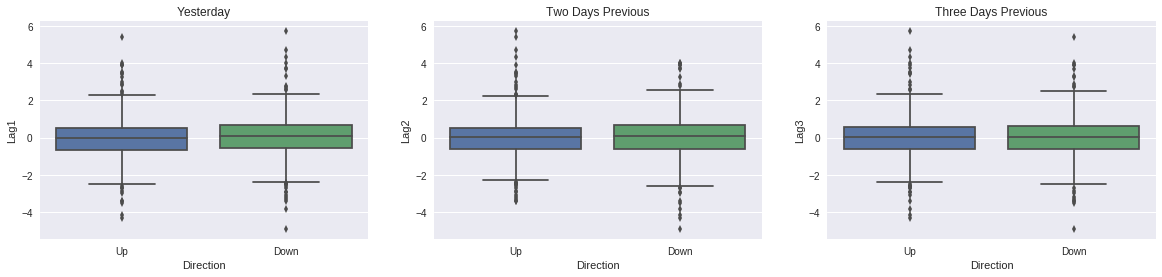

In [7]:
fig = plt.figure(figsize=(20,4))

fig.add_subplot(131)
sns.boxplot(x='Direction', y='Lag1', data=market_df)
plt.title("Yesterday")

fig.add_subplot(132)
sns.boxplot(x='Direction', y='Lag2', data=market_df)
plt.title("Two Days Previous")

fig.add_subplot(133)
sns.boxplot(x='Direction', y='Lag3', data=market_df)
plt.title("Three Days Previous")

print("Figure 1.2")

## Gene Expression Data

#### Domain 

This problem is drawn from the analysis of gene expression data. 

#### Problem Statement

Given the expression measurements of 64 cell lines, we wish to project these cell lines into two dimensions and perform an unsupervised cluster analysis in order to identify similar cell lines.

#### Dataset and Inputs

The dataset to be examined is the `NCI60` dataset, which consists of 6830 gene expression measurements for each of 64 cancer cell lines.

#### Solution Statement

A solution to this problem will be a cluster analysis using a model such as a KMeans Clustering or a Gaussian Mixture Model. 

#### Benchmark Model

N/A

#### Evaluation Metrics

Given that this is a clustering task, we can measure the success of our model using the Silhouette Score.



In [8]:
gene_expression_df = pd.read_csv('data/NCI60.csv', index_col='Index')
gene_expression_df.sample(4)

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
Index,,,,,,,,,,,,,,,,,,,,,
V53,-0.429981,-0.389981,-0.179981,0.860019,0.785019,0.04002,0.27002,-0.104981,6.001953e-02,-0.644961,...,-0.24998,0.200019,0.495019,0.180000,6.001953e-02,0.33001,0.10002,-0.09998,-1.46998,NSCLC
V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-0.54000,-0.64000,-0.585000,-7.700000e-01,-0.244980,...,0.00000,-0.740000,-2.095000,-1.390020,-4.000000e-01,0.69999,0.29000,0.55000,0.00000,CNS
V54,0.160000,-0.340000,-0.020000,-1.730000,-0.625000,-0.14000,-0.09000,0.435000,0.000000e+00,0.465019,...,0.00000,0.000000,0.075000,0.229980,-2.081676e-17,-0.85001,0.18000,0.05000,1.93000,NSCLC
V19,0.150000,-0.450000,-0.320000,-1.610000,-0.095000,-0.08000,0.00000,0.225000,-1.629691e-18,0.765019,...,2.68000,1.180000,1.095000,0.419981,1.700000e-01,0.00000,1.07000,0.80000,2.76000,NSCLC


In [9]:
from sklearn.decomposition import PCA

number_of_dimensions = 2
pca = PCA(n_components=number_of_dimensions)

pca.fit(gene_expression_df.drop('labs', axis=1))
gene_exp_2d = pca.transform(gene_expression_df.drop('labs', axis=1))

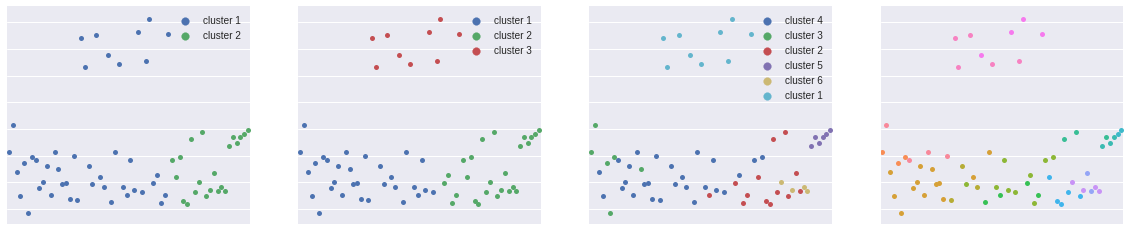

In [10]:
from sklearn.cluster import KMeans

number_of_clusters = [2,3,6,14]

fig = plt.figure(figsize=(20,4))

for i, clusters in enumerate(number_of_clusters):
    fig.add_subplot(101+i+10*len(number_of_clusters))
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(gene_expression_df.drop('labs', axis=1))
    labels = ['cluster ' + str(label+1) for label in kmeans.labels_]
    ax = sns.swarmplot(x=gene_exp_2d[:,0], y=gene_exp_2d[:,1], hue=labels)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.legend(loc='upper right')
    if i == 3: ax.legend_.remove()